In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
sns.plt.rcParams["figure.figsize"] = (12,5)

In [2]:
import sqlite3

In [3]:
import os

In [4]:
os.chdir("c:/dellbackup/all things data science/datasets")

In [5]:
import sqlite3

In [6]:
con = sqlite3.connect("database.sqlite")

In [7]:
c = con.cursor()

In [8]:
from sqlalchemy import create_engine

In [9]:
conn = create_engine("sqlite:///database.sqlite")

In [10]:
df = pd.read_sql_table("otp",conn)

In [11]:
df.head()

,train_id,direction,origin,next_station,date,status,timeStamp
0,778,N,Trenton,Stenton,2016-03-23,1 min,2016-03-23 00:01:47
1,598,N,Thorndale,Narberth,2016-03-23,1 min,2016-03-23 00:01:58
2,279,S,Elm,Ridley Park,2016-03-23,2 min,2016-03-23 00:02:02
3,476,N,Airport Terminal E-F,Suburban Station,2016-03-23,On Time,2016-03-23 00:03:19
4,474,N,Airport Terminal E-F,Jenkintown-Wyncote,2016-03-23,On Time,2016-03-23 00:03:35


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1438490 entries, 0 to 1438489
Data columns (total 7 columns):
train_id        1438490 non-null object
direction       1438490 non-null object
origin          1438490 non-null object
next_station    1438490 non-null object
date            1438490 non-null object
status          1438490 non-null object
timeStamp       1438490 non-null datetime64[ns]
dtypes: datetime64[ns](1), object(6)
memory usage: 76.8+ MB


In [14]:
df.loc[df.status == "1440 min","status"] == "999 min"
df["status_n"] = df.status.str.replace("On Time", "0").str.replace(" min","").astype("int")

In [15]:
df.head()

,train_id,direction,origin,next_station,date,status,timeStamp,status_n
0,778,N,Trenton,Stenton,2016-03-23,1 min,2016-03-23 00:01:47,1
1,598,N,Thorndale,Narberth,2016-03-23,1 min,2016-03-23 00:01:58,1
2,279,S,Elm,Ridley Park,2016-03-23,2 min,2016-03-23 00:02:02,2
3,476,N,Airport Terminal E-F,Suburban Station,2016-03-23,On Time,2016-03-23 00:03:19,0
4,474,N,Airport Terminal E-F,Jenkintown-Wyncote,2016-03-23,On Time,2016-03-23 00:03:35,0


In [16]:
t = df[df.train_id=="550"].sort_values(by = "timeStamp")
t.head()

,train_id,direction,origin,next_station,date,status,timeStamp,status_n
3238,550,N,None,None,2016-03-23,On Time,2016-03-23 10:10:39,0
3375,550,N,Thorndale,Downingtown,2016-03-23,11 min,2016-03-23 10:28:30,11
3415,550,N,Thorndale,Whitford,2016-03-23,11 min,2016-03-23 10:33:09,11
3427,550,N,Thorndale,Exton,2016-03-23,11 min,2016-03-23 10:35:09,11
3457,550,N,Thorndale,Malvern,2016-03-23,10 min,2016-03-23 10:40:04,10


In [17]:
#checking how does the lateness of this particular train evolve over time

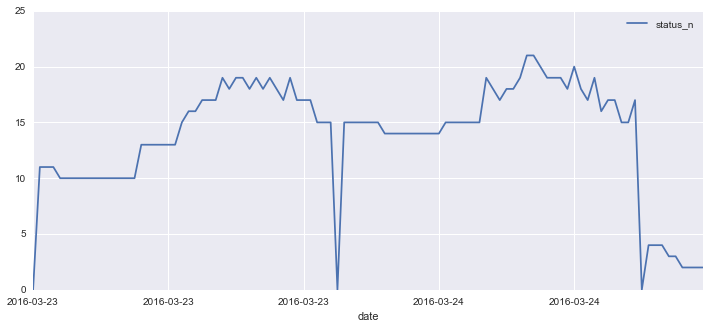

In [21]:
df[df.train_id=="550"].sort_values(by='timeStamp').iloc[:100].plot(x='date', y='status_n')

In [22]:
#now we calculate how each individual station contribute to a train's lateness

In [23]:
t["status_diff"] = t.status_n.diff()
t.head()

,train_id,direction,origin,next_station,date,status,timeStamp,status_n,status_diff
3238,550,N,None,None,2016-03-23,On Time,2016-03-23 10:10:39,0,NaN
3375,550,N,Thorndale,Downingtown,2016-03-23,11 min,2016-03-23 10:28:30,11,11.0
3415,550,N,Thorndale,Whitford,2016-03-23,11 min,2016-03-23 10:33:09,11,0.0
3427,550,N,Thorndale,Exton,2016-03-23,11 min,2016-03-23 10:35:09,11,0.0
3457,550,N,Thorndale,Malvern,2016-03-23,10 min,2016-03-23 10:40:04,10,-1.0


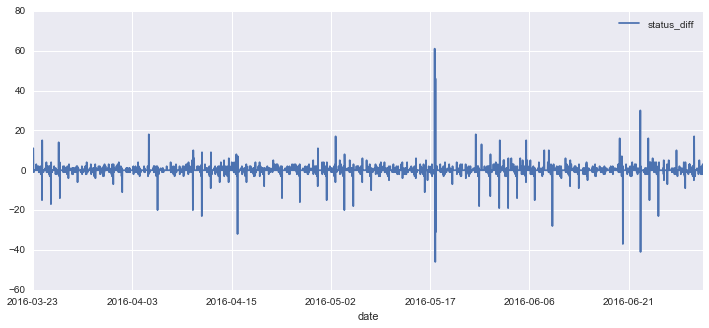

In [24]:
t.plot(x="date",y="status_diff")

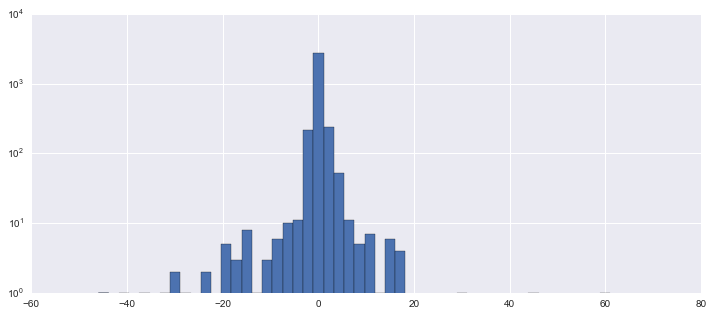

In [25]:
t.status_diff.hist(bins = 50, log = True)

In [26]:
tg = t.groupby(["next_station"]).mean().sort_values(["status_diff"])
tg

,status_n,status_diff
next_station,,
None,0.000000,-9.289474
New Britain,7.581081,-2.283784
North Wales,8.920000,-1.400000
North Broad St,1.000000,-1.400000
9th St,8.932432,-1.391892
Suburban Station,8.118421,-1.078947
North Hills,10.000000,-0.853333
Oreland,9.540541,-0.297297
Pennbrook,8.666667,-0.253333


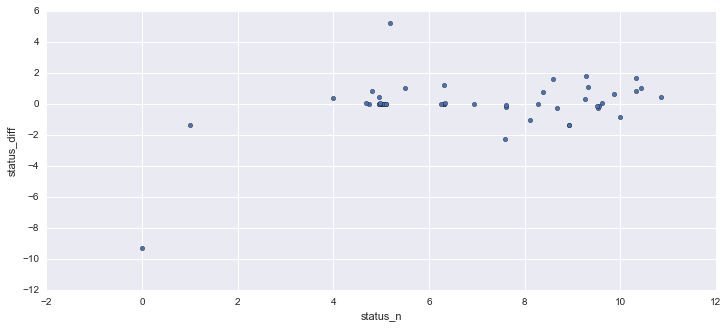

In [27]:
tg.plot(kind = "scatter",x="status_n",y="status_diff")

In [28]:
tg.corr()

,status_n,status_diff
status_n,1.000000,0.351667
status_diff,0.351667,1.000000


In [29]:
df.sort_values(by=["train_id","timeStamp"],inplace=True)

In [31]:
df.loc[df.next_station =="None",'status_diff'] = np.NaN
df.head()

,train_id,direction,origin,next_station,date,status,timeStamp,status_n,status_diff
284229,102TT,N,None,None,2016-04-22,On Time,2016-04-22 13:14:08,0,NaN
284248,102TT,N,Devon,Strafford,2016-04-22,On Time,2016-04-22 13:16:08,0,NaN
284260,102TT,N,Devon,Wayne-A,2016-04-22,On Time,2016-04-22 13:18:07,0,NaN
779,1054,N,None,None,2016-03-23,On Time,2016-03-23 06:28:11,0,NaN
793,1054,N,Cynwyd,Bala,2016-03-23,On Time,2016-03-23 06:30:01,0,NaN


In [34]:
diffs = df.dropna().groupby(['next_station']).mean().sort_values(['status_diff'])